# Project on Micro-Credit Defaulter Model 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 


We have to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter

# Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [23]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/Micro Credit Project/Data file.csv")
df
pd.pandas.set_option('display.max_columns',41)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


To display all rows i use pd.set_option method

In [24]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [25]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

All features are integer and float type except 2 features

In [26]:
#checking dimension
df.shape

(209593, 37)

This dataset has 209593 rows and 37 features

In [27]:
#statistical analysis
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


More features have standard deviation is more comparing to mean,so they are outliers.We have to remove outlier later.

# Checking Null Values

In [28]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

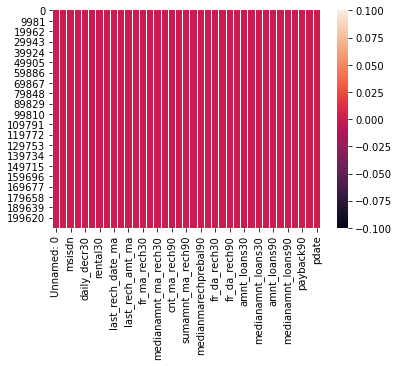

In [29]:
sns.heatmap(df.isnull())

No Null values are present in the dataset

In [30]:
#About dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# Visualization of Catagorical Features

1    183431
0     26162
Name: label, dtype: int64


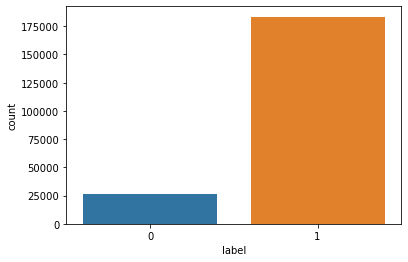

In [32]:
sns.countplot(x='label',data=df)
print(df['label'].value_counts())

As we know that label is our target variable,but after visualization above output column,we found that dataset is imbalanced(approxmately 88% is 1 and 12% is 0).So We have to use undersampling and oversampling method to make the dataset balanced in later stage.

UPW    209593
Name: pcircle, dtype: int64


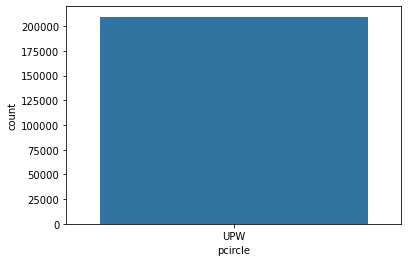

In [33]:
print(df['pcircle'].value_counts())
sns.countplot(x='pcircle',data=df)

Checking unique values count in this dataset.

In [34]:
df.nunique().sort_values()

pcircle                      1
label                        2
maxamnt_loans90              3
medianamnt_loans90           6
medianamnt_loans30           6
cnt_da_rech90               27
cnt_loans30                 40
fr_da_rech90                46
amnt_loans30                48
amnt_loans90                69
last_rech_amt_ma            70
cnt_ma_rech30               71
pdate                       82
fr_ma_rech90                89
cnt_ma_rech90              110
medianamnt_ma_rech30       510
medianamnt_ma_rech90       608
maxamnt_loans30           1050
cnt_da_rech30             1066
fr_da_rech30              1072
fr_ma_rech30              1083
cnt_loans90               1110
last_rech_date_da         1174
last_rech_date_ma         1186
payback30                 1363
payback90                 2381
aon                       4507
sumamnt_ma_rech30        15141
medianmarechprebal90     29785
medianmarechprebal30     30428
sumamnt_ma_rech90        31771
rental30                132148
rental90

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


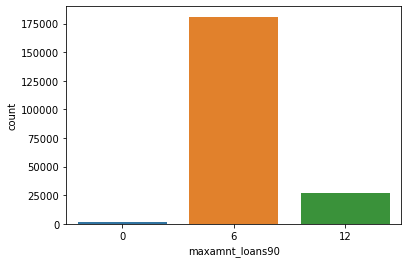

In [35]:
sns.countplot(x='maxamnt_loans90',data=df)
print(df['maxamnt_loans90'].value_counts())

Maximum amount of loan taken in 90 days is 6

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64


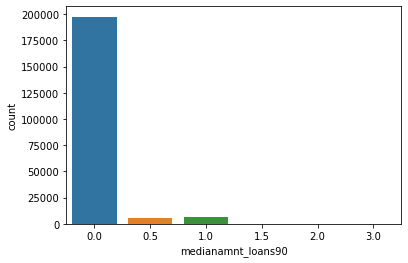

In [36]:
sns.countplot(x='medianamnt_loans90',data=df)
print(df['medianamnt_loans90'].value_counts())

More customers have 0 median of loan amount taken in 90 days

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64


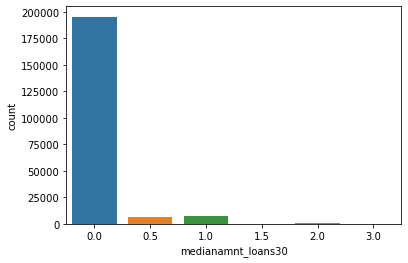

In [37]:
sns.countplot(x='medianamnt_loans30',data=df)
print(df['medianamnt_loans30'].value_counts())

More customers have 0 median of loan amount taken in 30 days

We have to drop Unnamed:0 column as it shows same what our index is showing.

In [38]:
df=df.drop("Unnamed: 0",axis=1)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


We have to drop msisdn column As it is sowing mobile number of customer which is not necessery for our target variable

In [39]:
df=df.drop('msisdn',axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


We have to drop pcircle column as the whole column has only 1 value.

In [40]:
df=df.drop('pcircle',axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


We have to divide pdate column in date,month and year format to see relationship with label column

In [41]:
df['year']=df['pdate'].apply(lambda x:int(x.split('-')[0]))

In [42]:
df['month']=df['pdate'].apply(lambda x:int(x.split('-')[1]))

In [43]:
df['date']=df['pdate'].apply(lambda x:int(x.split('-')[-1]))

In [44]:
df['year'].unique()

array([2016], dtype=int64)

In [45]:
df['month'].unique()

array([7, 8, 6], dtype=int64)

In [46]:
df['date'].unique()

array([20, 10, 19,  6, 22,  2,  5, 15,  8, 12, 29, 16,  3, 24,  4,  1, 26,
       23,  9,  7, 27, 11, 30, 14, 21, 25, 28, 18, 13, 17, 31],
      dtype=int64)

7    85765
6    83154
8    40674
Name: month, dtype: int64


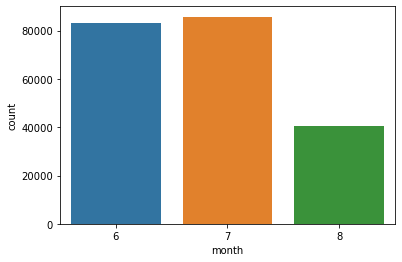

In [47]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df)

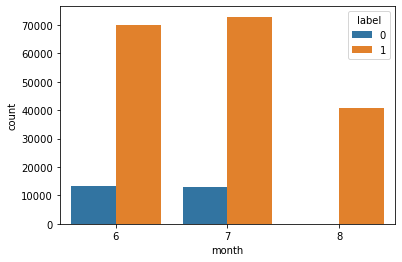

In [48]:
sns.countplot(x='month',hue='label',data=df)

In August month defaulter customer is less compared to june and july.

In [49]:
df=df.drop(['year','date','pdate'],axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7


# Checking Corelation

In [54]:
df.corr()['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech

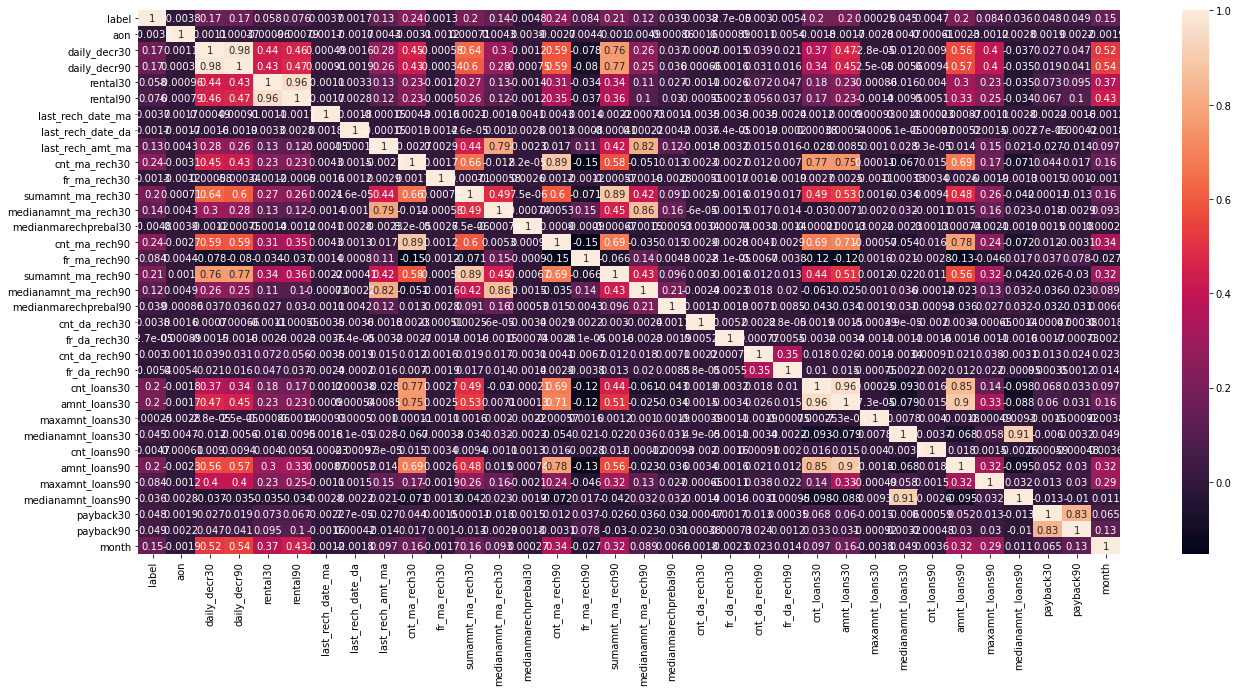

In [55]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

cnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90 and sumamnt_ma_rech30 are highly positive corelated with our output column

We have to divide dataset in dependent and independent variable

In [30]:
x=df.drop('label',axis=1)
y=df['label']

# Checking Outlier

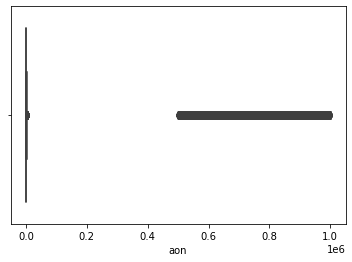

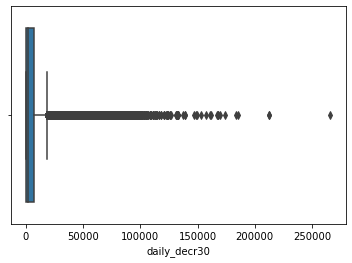

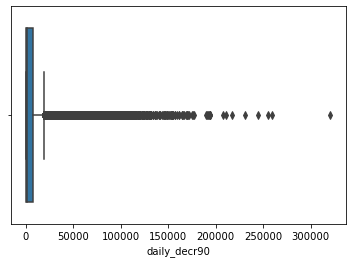

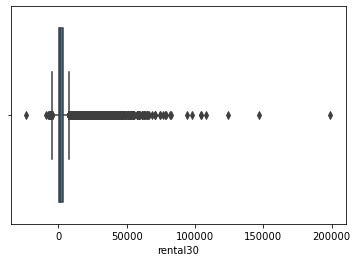

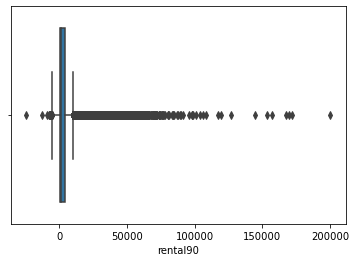

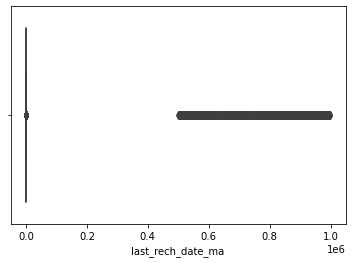

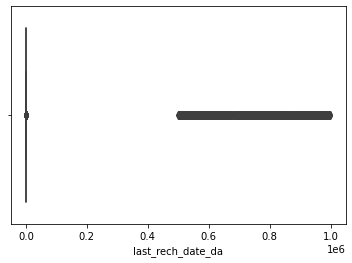

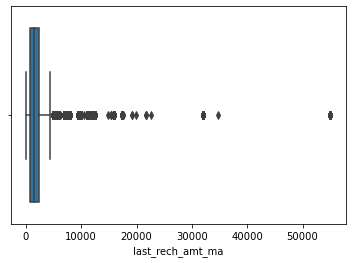

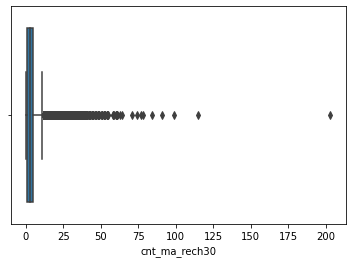

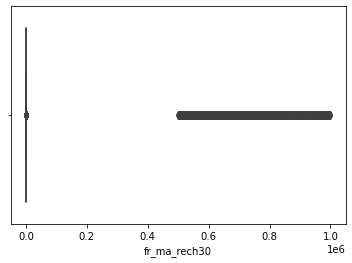

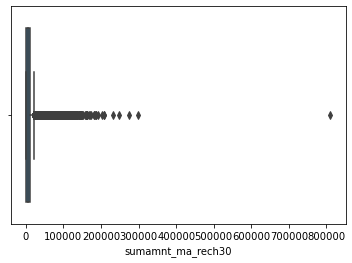

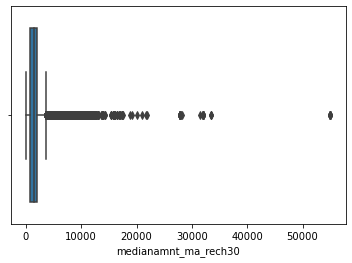

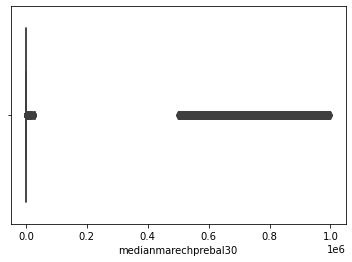

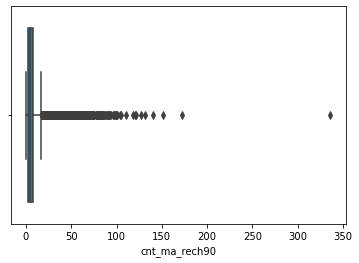

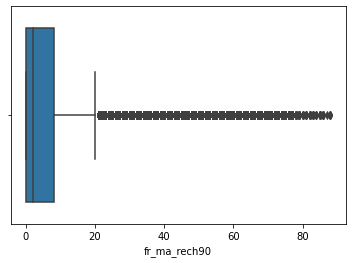

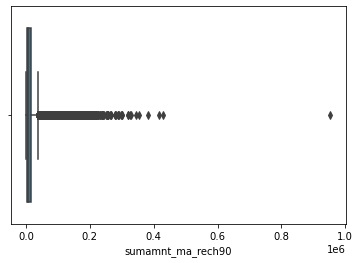

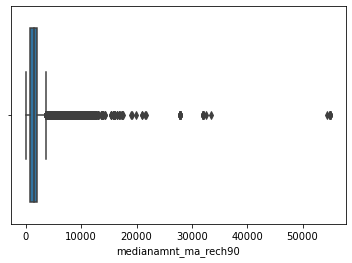

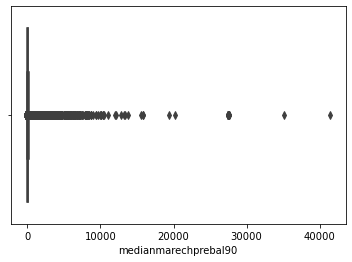

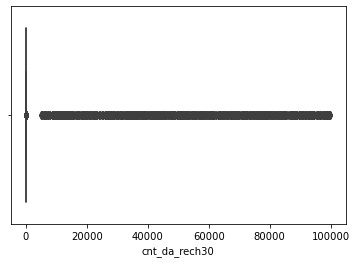

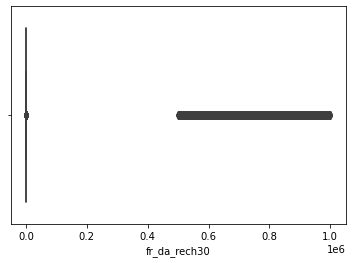

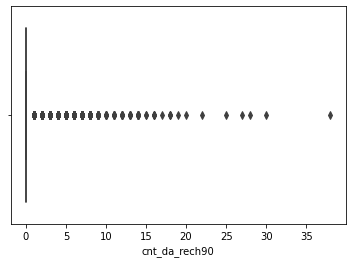

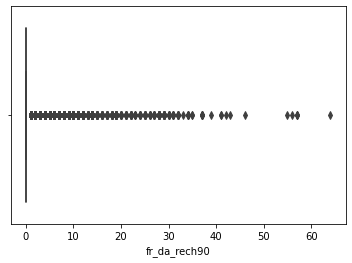

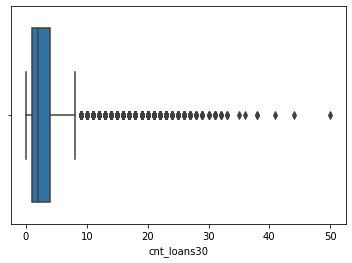

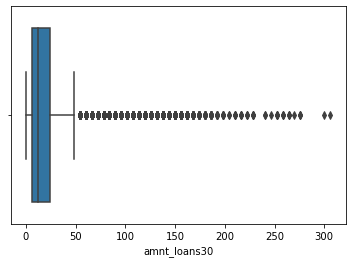

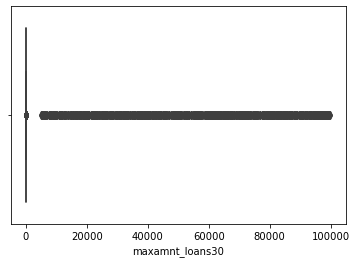

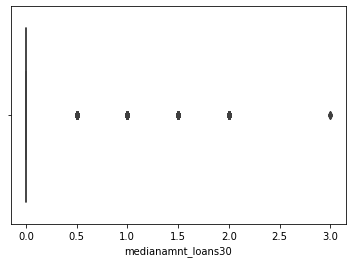

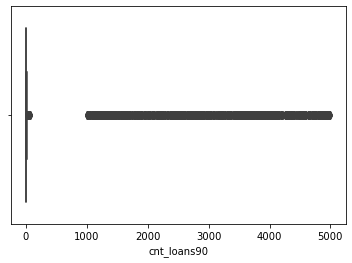

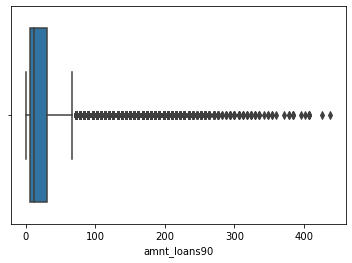

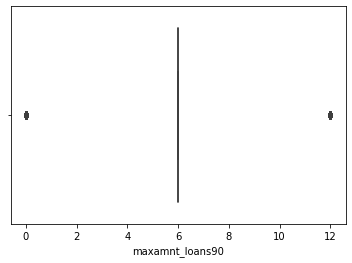

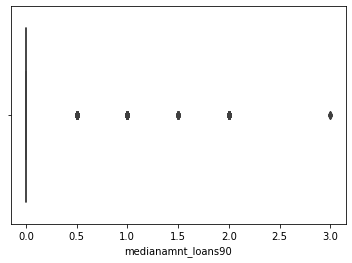

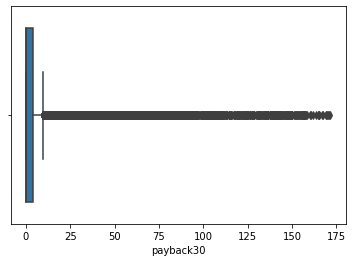

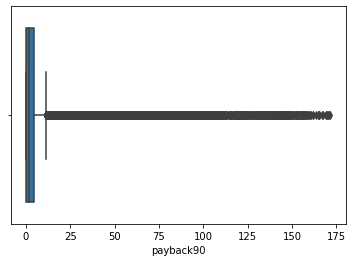

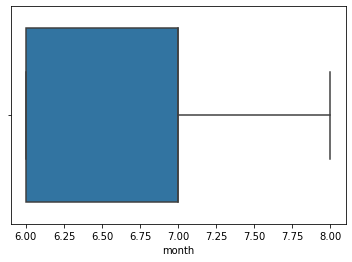

In [31]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

Some columns have outliers,so we have to remove it by simple techniques

After looking at boxplot of features and description of features(such as min_value,25%,75%,std,max_value),We remove outlier below.

In [32]:
df=df[df['daily_decr30']<200000]

In [33]:
df=df[df['daily_decr90']<200000]

In [34]:
df=df[df['rental30']<130000]

In [35]:
df=df[df['rental90']<130000]

In [36]:
df=df[df['last_rech_amt_ma']<30000]

In [37]:
df=df[df['cnt_ma_rech30']<100]

In [38]:
df_new=df

In [39]:
df=df[df['sumamnt_ma_rech30']<400000]

In [40]:
df=df[df['medianamnt_ma_rech30']<25000]

In [41]:
df=df[df['cnt_ma_rech90']<150]

In [42]:
df=df[df['fr_ma_rech90']<81]

In [43]:
df=df[df['sumamnt_ma_rech90']<300000]

In [44]:
df=df[df['medianamnt_ma_rech90']<18000]

In [45]:
df=df[df['medianmarechprebal90']<30000]

In [46]:
df=df.drop('fr_da_rech30',axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7


In [47]:
df=df[df['cnt_loans30']<30]

In [48]:
df=df[df['amnt_loans30']<180]

In [49]:
df=df[df['maxamnt_loans30']<13]

In [50]:
df=df[df['cnt_loans90']<54]

In [51]:
df=df[df['amnt_loans90']<324]

After removing outliers my new dataset shape is:

In [52]:
df.shape

(207255, 33)

Dataloss=

In [53]:
dataloss=(209593-207255)/209593
dataloss

0.011154952694030813

1.11% outlier removed

1    181390
0     25865
Name: label, dtype: int64


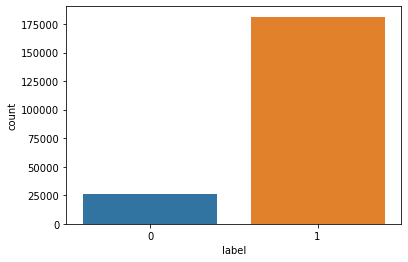

In [54]:
print(df['label'].value_counts())
sns.countplot(df['label'])

This dataset is imbalanced so  first we use undersampling then use oversampling.Where the dataset gives more accuracy we have to save that model for future use

In [56]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7


In [57]:
x=df.drop('label',axis=1)
y=df['label']

# Under_Sampling method

In [58]:
from imblearn.under_sampling import NearMiss

In [59]:
nm=NearMiss()
x_res,y_res=nm.fit_sample(x,y)

In [60]:
x_res.shape

(51730, 32)

In [61]:
y_res.shape

(51730,)

Checking distribution

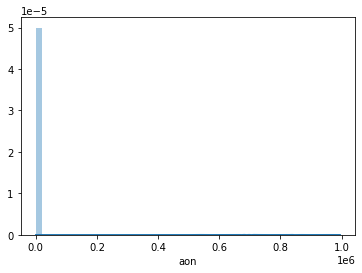

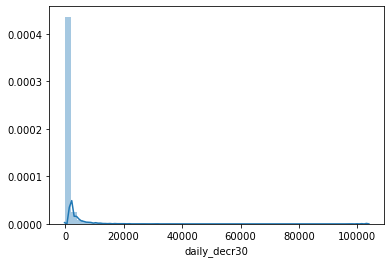

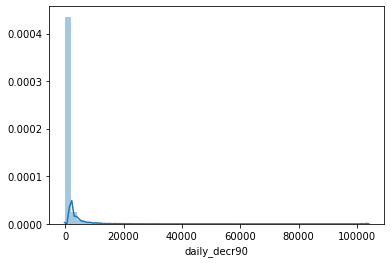

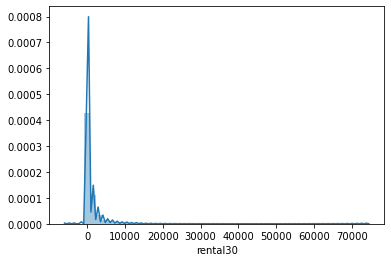

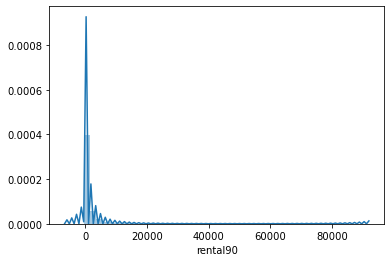

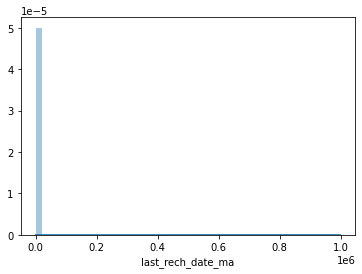

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


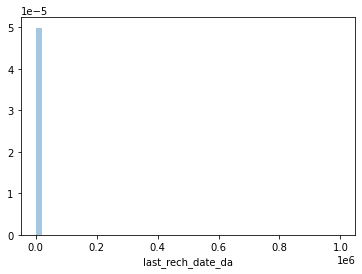

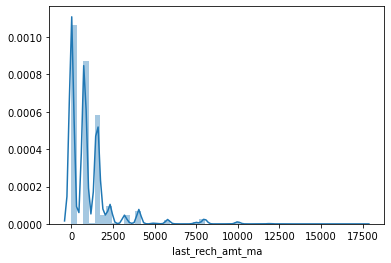

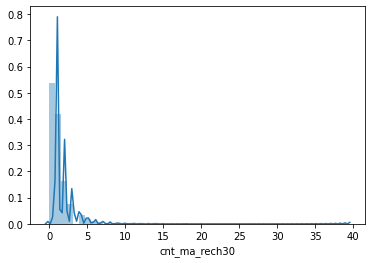

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


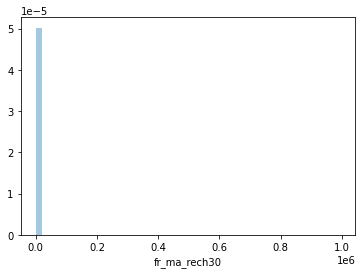

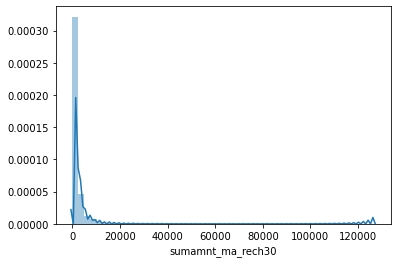

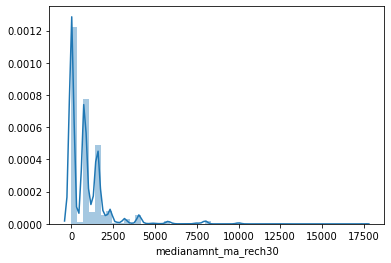

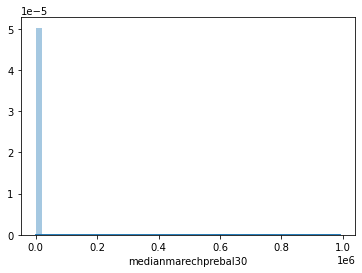

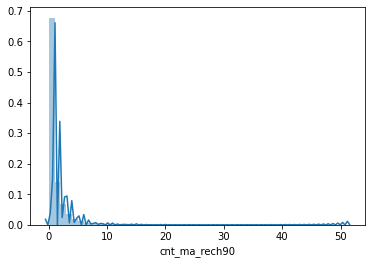

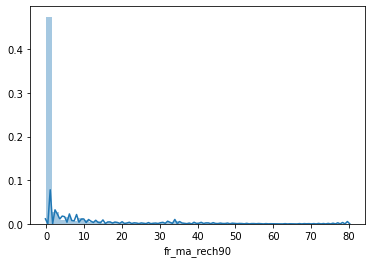

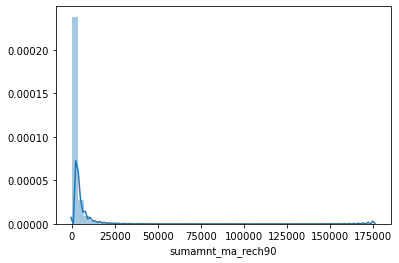

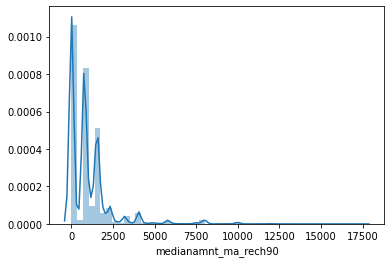

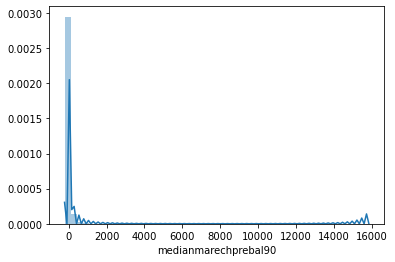

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


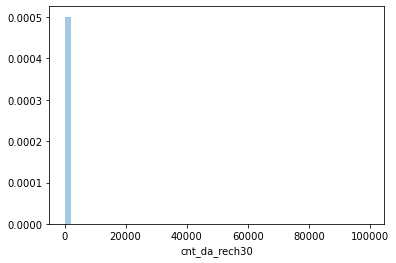

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


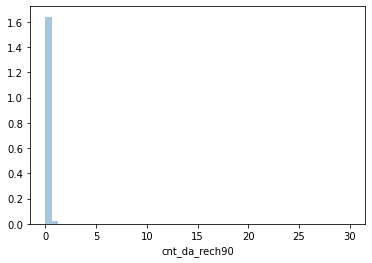

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


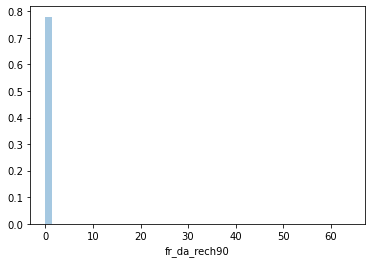

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


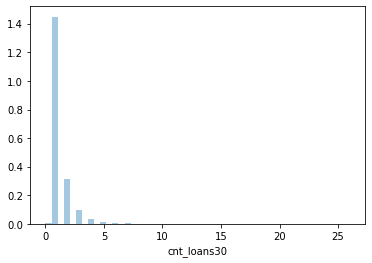

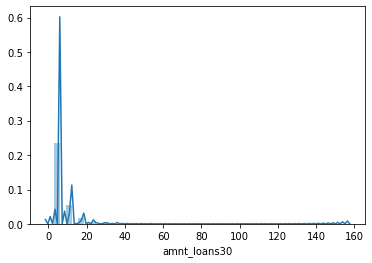

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


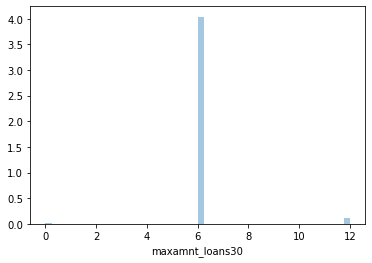

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


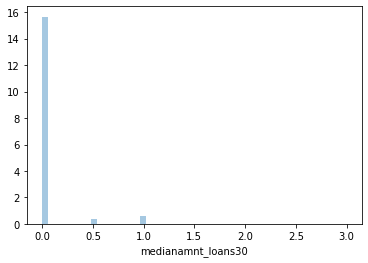

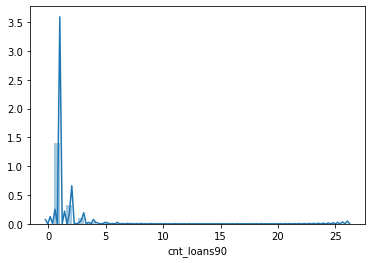

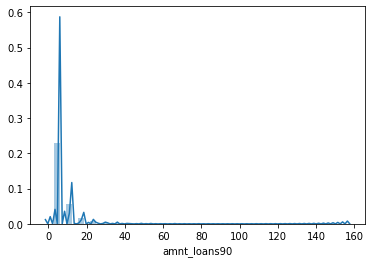

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


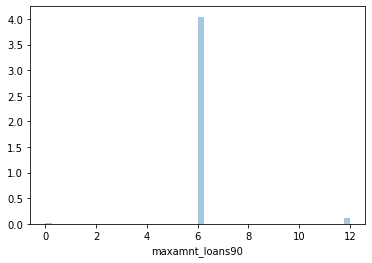

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


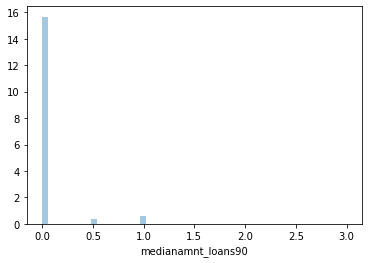

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


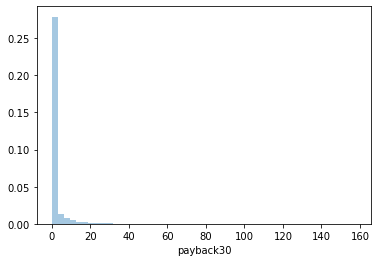

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


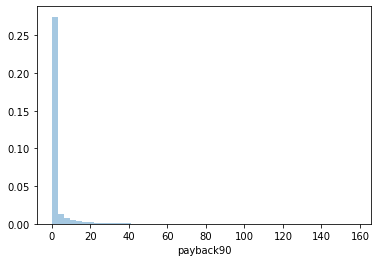

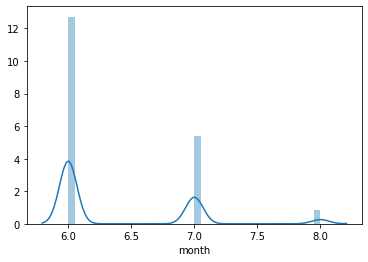

In [62]:
for i in x_res:
    sns.distplot(x_res[i])
    plt.show()

In [63]:
x_res.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90',
       'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'month'],
      dtype='object')

Some independent feature columns have discrete value so we dont consider that columns and checking skewness of other independent features

In [64]:
coltouse=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90',
       'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30',
       'cnt_loans90', 'amnt_loans90', 'payback30', 'payback90']

In [65]:
x_res.skew()

aon                     13.947686
daily_decr30            10.053342
daily_decr90            10.045326
rental30                 5.714756
rental90                 5.967648
last_rech_date_ma       22.757834
last_rech_date_da       21.784952
last_rech_amt_ma         3.491433
cnt_ma_rech30            4.149504
fr_ma_rech30            21.188543
sumamnt_ma_rech30        8.198757
medianamnt_ma_rech30     3.536049
medianmarechprebal30    19.119319
cnt_ma_rech90            4.839531
fr_ma_rech90             3.422112
sumamnt_ma_rech90        8.618171
medianamnt_ma_rech90     3.459147
medianmarechprebal90    35.098226
cnt_da_rech30           27.353517
cnt_da_rech90           35.629873
fr_da_rech90            34.872798
cnt_loans30              5.023457
amnt_loans30             5.087360
maxamnt_loans30          4.669816
medianamnt_loans30       4.507708
cnt_loans90              5.627807
amnt_loans90             5.696451
maxamnt_loans90          4.738756
medianamnt_loans90       4.542382
payback30     

Some Skewness is present in columns,so we have to remove it's skewness by using power_transform methhod

In [66]:
from sklearn.preprocessing import power_transform
for i in x_res[coltouse].columns:
    x_res[i]=power_transform(x_res[[i]])

Skewness has been removed

Choosing bestrandom_state

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
maxacc=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy is",maxacc,"on random_state",maxrs)
        

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

best accuracy is 0.7103228300792577 on random_state 83


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=83)

In [70]:
x_train

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
18480,-0.228267,2.149685,2.147641,0.454387,0.371479,0.073292,-0.037895,1.193379,1.012188,1.888464,1.131362,1.088915,0.009365,1.430684,1.839833,1.213772,0.820007,-0.155849,-0.117376,-0.129019,-0.053565,1.293868,1.091992,-0.123953,0.0,1.206806,1.002597,6,0.0,-0.410400,-0.433476,7
30038,0.196657,-0.428666,-0.430808,-0.335190,-0.333714,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.410400,-0.433476,6
23819,-0.222054,-0.966157,-0.967646,0.150740,0.098661,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.410400,-0.433476,6
50168,-0.098681,1.206374,1.203715,-0.161774,-0.179018,-0.033471,-0.037895,0.487139,0.397077,-0.538777,0.513073,0.652950,0.057494,0.200199,-0.607422,0.307004,0.491523,0.115020,-0.117376,-0.129019,-0.053565,-0.482042,1.091992,5.064853,0.0,-0.514069,1.002597,12,0.0,-0.410400,-0.433476,8
29293,-0.021715,-0.412622,-0.414778,-0.415278,-0.405502,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,1.293868,1.091992,-0.123953,0.0,1.206806,1.002597,6,0.0,-0.410400,-0.433476,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0.228540,-0.307437,-0.309683,0.113077,0.065245,0.192762,-0.037895,1.019237,0.397077,-0.538777,0.877381,1.080204,0.135738,0.814659,1.818498,0.868166,0.848427,0.421058,-0.117376,-0.129019,-0.053565,1.293868,1.091992,-0.123953,0.0,1.206806,1.002597,6,0.0,-0.410400,-0.433476,6
36096,-0.259900,-0.388491,-0.390669,-0.262952,-0.269190,0.053113,-0.037895,0.811136,0.397077,-0.538777,0.739208,0.917012,0.081452,0.200199,-0.607422,0.563351,0.820007,0.323983,-0.117376,-0.129019,-0.053565,1.293868,1.091992,-0.123953,0.5,1.206806,1.002597,6,0.5,2.418127,2.270999,6
27904,-0.036000,-0.767221,-0.768994,-0.228419,-0.238391,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.410400,-0.433476,6
46056,0.065393,1.364513,1.361882,-0.453874,-0.440362,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,1.091992,5.064853,0.0,-0.514069,1.002597,12,0.0,-0.410400,-0.433476,8


In [71]:
y_train

18480    0
30038    1
23819    0
50168    1
29293    1
        ..
1320     0
36096    1
27904    1
46056    1
34898    1
Name: label, Length: 41384, dtype: int64

In [72]:
x_test

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
7352,-0.108217,1.041186,1.038509,1.375238,1.289583,0.335750,-0.037895,0.488855,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,0.200199,-0.607422,0.308380,0.493261,-0.183940,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.4104,-0.433476,7
1120,0.108150,1.440953,1.440411,-0.008511,0.038163,0.330249,-0.037895,1.546432,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,0.200199,-0.607422,1.123155,1.567934,0.065021,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,1.206806,1.002597,6,0.0,-0.4104,-0.433476,7
28713,0.116730,-0.650096,-0.652011,-0.359212,-0.355209,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.4104,-0.433476,6
29650,0.278373,-0.495247,-0.497326,-0.363669,-0.359201,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,1.293868,1.091992,-0.123953,0.5,1.206806,1.002597,6,0.5,-0.4104,-0.433476,6
21597,0.043757,-0.924702,-0.926255,-0.453874,-0.440362,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.4104,-0.433476,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,-0.270795,-0.629259,-0.631198,-0.347281,-0.344530,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.4104,-0.433476,6
19655,0.129659,-0.140250,-0.142618,0.206091,0.147753,0.029839,-0.037895,0.488855,1.012188,1.996482,0.978380,0.917524,0.044761,0.814659,1.825204,0.844801,0.820661,0.017543,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.4104,-0.433476,6
34645,-0.289576,-0.408914,-0.411074,-0.193224,-0.207027,0.160648,-0.037895,0.813707,0.397077,-0.538777,0.740947,0.919057,0.034959,0.200199,-0.607422,0.565359,0.822617,-0.050496,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.4104,-0.433476,6
21859,0.174835,1.041186,1.038509,0.725851,0.777695,-0.085143,-0.037895,-1.282896,-1.087458,-0.538777,-1.147393,-1.155181,-0.008842,-1.187446,-0.607422,-1.268683,-1.285539,-0.264219,-0.117376,-0.129019,-0.053565,-0.482042,-0.487554,-0.123953,0.0,-0.514069,-0.511464,6,0.0,-0.4104,-0.433476,7


In [73]:
y_test

7352     0
1120     0
28713    1
29650    1
21597    0
        ..
26936    1
19655    0
34645    1
21859    0
4447     0
Name: label, Length: 10346, dtype: int64

# Using different algorithm

In [74]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [75]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8221534892712159
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      5207
           1       0.82      0.82      0.82      5139

    accuracy                           0.82     10346
   macro avg       0.82      0.82      0.82     10346
weighted avg       0.82      0.82      0.82     10346

[[4297  910]
 [ 930 4209]]


In [76]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7103228300792577
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      5207
           1       0.68      0.80      0.73      5139

    accuracy                           0.71     10346
   macro avg       0.72      0.71      0.71     10346
weighted avg       0.72      0.71      0.71     10346

[[3259 1948]
 [1049 4090]]


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6781364778658419
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      5207
           1       0.62      0.92      0.74      5139

    accuracy                           0.68     10346
   macro avg       0.73      0.68      0.66     10346
weighted avg       0.73      0.68      0.66     10346

[[2301 2906]
 [ 424 4715]]


In [78]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8790837038468974
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5207
           1       0.87      0.89      0.88      5139

    accuracy                           0.88     10346
   macro avg       0.88      0.88      0.88     10346
weighted avg       0.88      0.88      0.88     10346

[[4499  708]
 [ 543 4596]]


# Using Ensemble algorithm

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8678716412139957
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      5207
           1       0.85      0.89      0.87      5139

    accuracy                           0.87     10346
   macro avg       0.87      0.87      0.87     10346
weighted avg       0.87      0.87      0.87     10346

[[4424  783]
 [ 584 4555]]


In [81]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.849217088729944
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      5207
           1       0.83      0.88      0.85      5139

    accuracy                           0.85     10346
   macro avg       0.85      0.85      0.85     10346
weighted avg       0.85      0.85      0.85     10346

[[4277  930]
 [ 630 4509]]


In [82]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8566595785810941
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5207
           1       0.84      0.89      0.86      5139

    accuracy                           0.86     10346
   macro avg       0.86      0.86      0.86     10346
weighted avg       0.86      0.86      0.86     10346

[[4309  898]
 [ 585 4554]]


# Checking Roc_Auc_Curve

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

[12:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


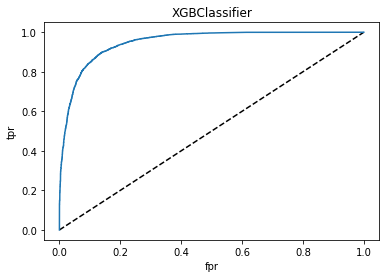

0.9496243344192202


In [85]:
ex=XGBClassifier()
ex.fit(x_train,y_train)
y_pred_prob=ex.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XGBClassifier')
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

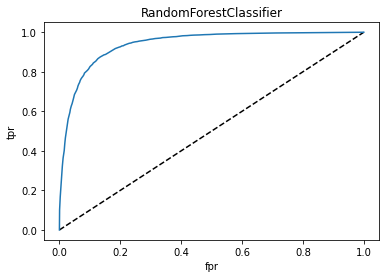

0.9396043308861733


In [86]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RandomForestClassifier')
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

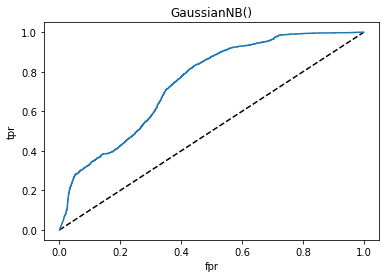

In [87]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred_prob=gn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(gn)
plt.show()

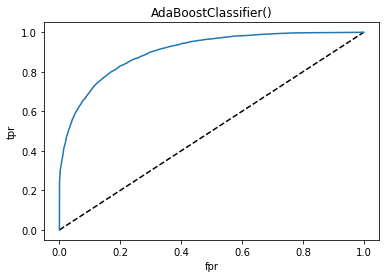

0.9022311542139568


In [138]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(ad)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


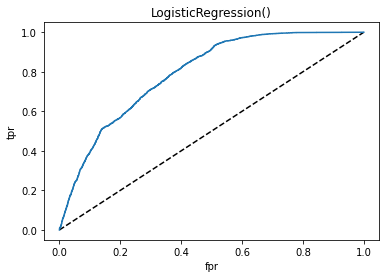

0.7928279260039314


In [89]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(lg)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

# Using OverSampling Method

In [90]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
rs=RandomOverSampler()

In [92]:
x1_res,y1_res=rs.fit_sample(x,y)

In [93]:
x1_res.shape

(362780, 32)

In [94]:
y1_res.shape

(362780,)

# Checking Skewness

In [95]:
x1_res.skew()

aon                     10.112715
daily_decr30             4.475667
daily_decr90             4.833843
rental30                 3.912452
rental90                 4.093617
last_rech_date_ma       15.113953
last_rech_date_da       14.993381
last_rech_amt_ma         2.533502
cnt_ma_rech30            2.931050
fr_ma_rech30            14.681229
sumamnt_ma_rech30        4.460621
medianamnt_ma_rech30     2.720001
medianmarechprebal30    14.044619
cnt_ma_rech90            3.267488
fr_ma_rech90             2.566192
sumamnt_ma_rech90        4.460459
medianamnt_ma_rech90     2.681538
medianmarechprebal90    22.864604
cnt_da_rech30           18.160213
cnt_da_rech90           27.746330
fr_da_rech90            25.764761
cnt_loans30              3.141516
amnt_loans30             3.230322
maxamnt_loans30          2.089281
medianamnt_loans30       4.988429
cnt_loans90              3.499885
amnt_loans90             3.556561
maxamnt_loans90          2.345109
medianamnt_loans90       5.270070
payback30     

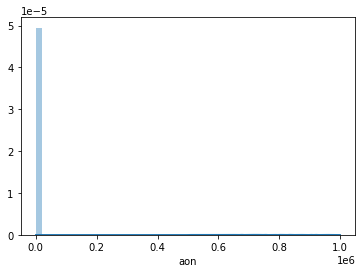

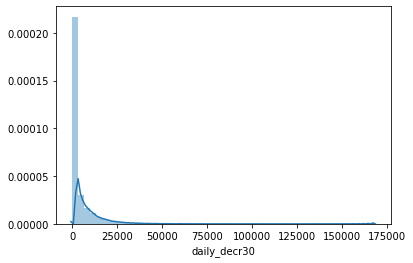

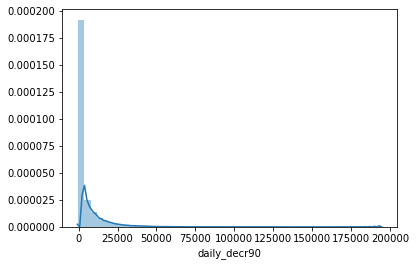

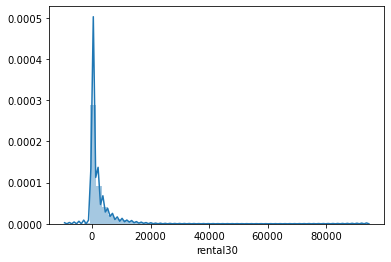

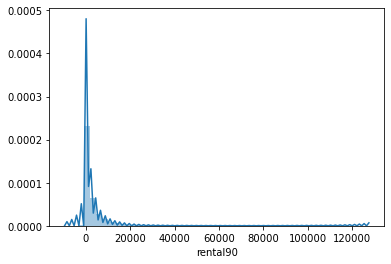

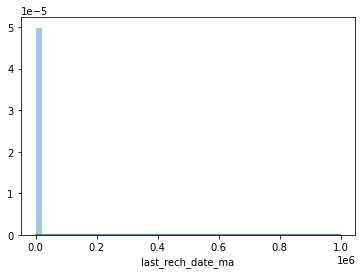

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


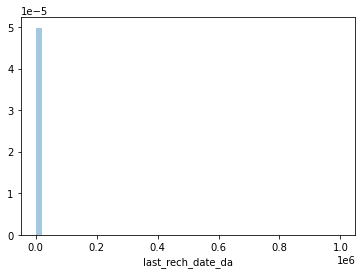

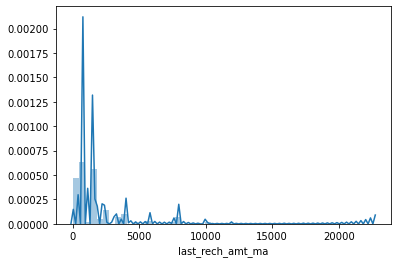

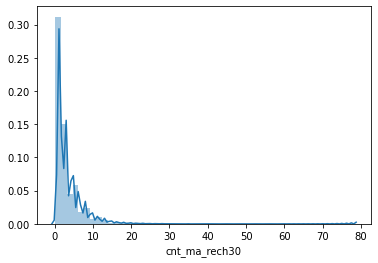

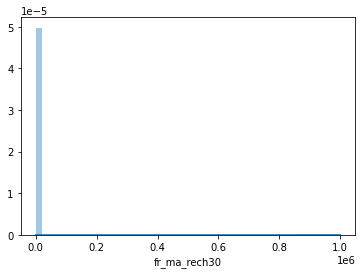

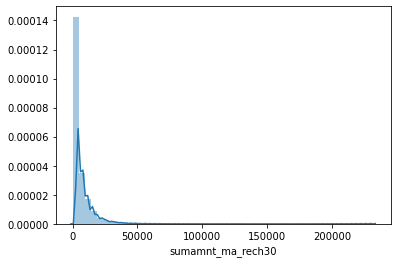

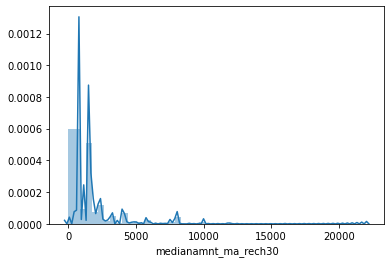

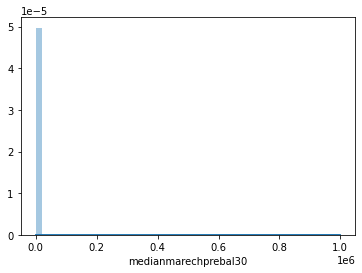

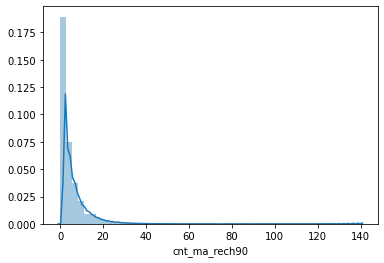

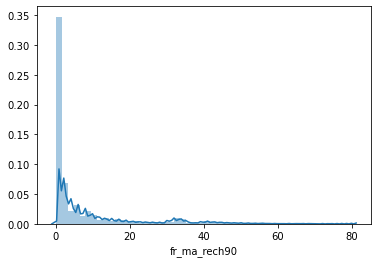

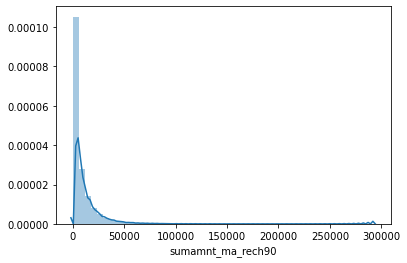

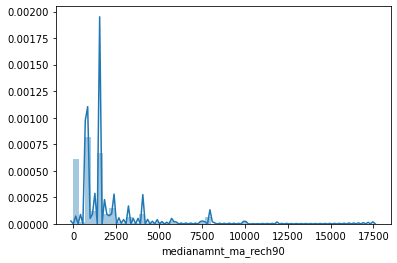

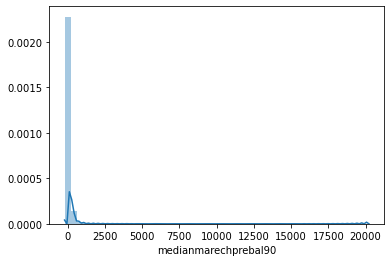

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


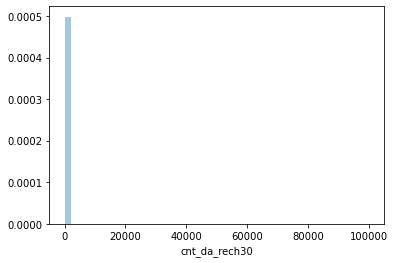

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


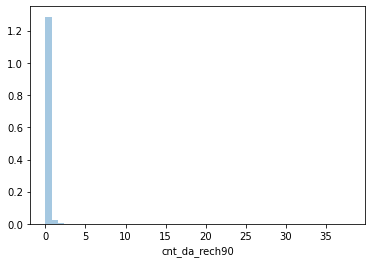

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


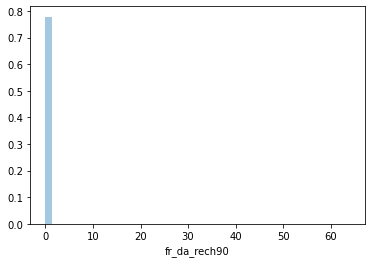

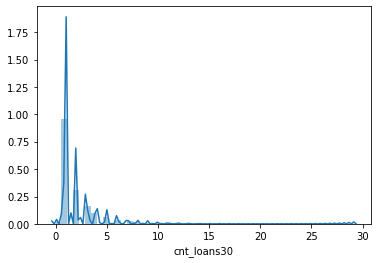

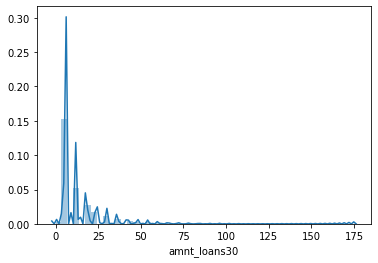

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


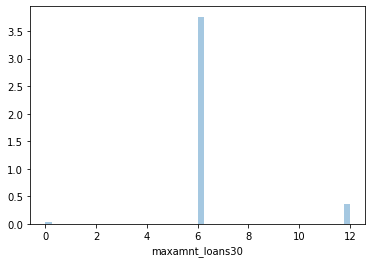

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


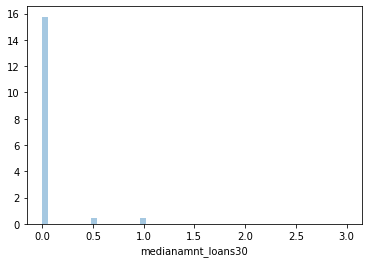

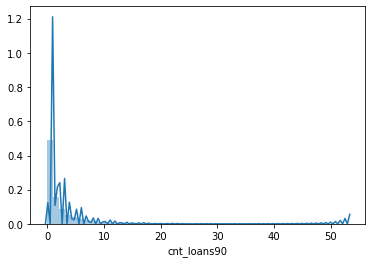

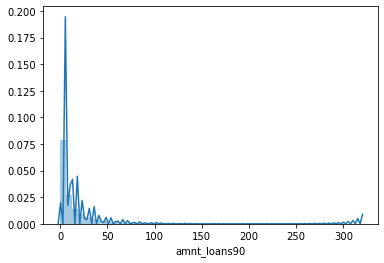

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


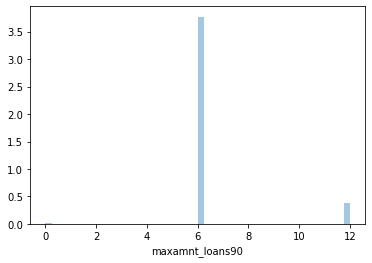

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


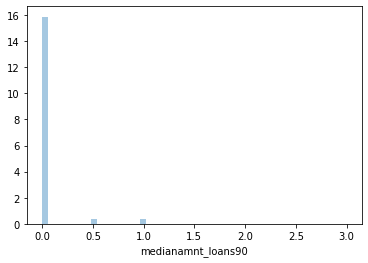

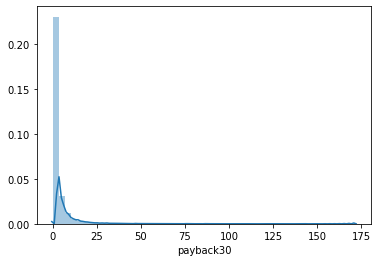

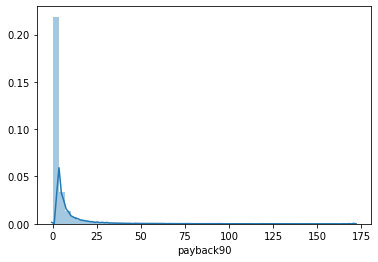

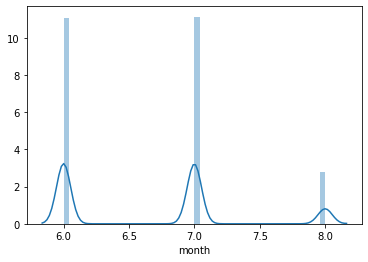

In [96]:
for i in x1_res.columns:
    sns.distplot(x1_res[i])
    plt.show()

Some Skewness is present,so we remove it by using power_transform_method

In [97]:
from sklearn.preprocessing import power_transform
for i in x1_res[coltouse].columns:
    x1_res[i]=power_transform(x1_res[[i]])

In [98]:
x1_res.skew()

aon                       1.813671
daily_decr30            -13.215759
daily_decr90            -13.901054
rental30                  0.400601
rental90                  0.477990
last_rech_date_ma        -7.571502
last_rech_date_da      -136.751817
last_rech_amt_ma         -0.371522
cnt_ma_rech30             0.057112
fr_ma_rech30              0.449750
sumamnt_ma_rech30        -0.377980
medianamnt_ma_rech30     -0.431631
medianmarechprebal30     -0.623078
cnt_ma_rech90             0.049144
fr_ma_rech90              0.342164
sumamnt_ma_rech90        -0.326710
medianamnt_ma_rech90     -0.385020
medianmarechprebal90      4.150248
cnt_da_rech30             7.229229
cnt_da_rech90             6.473406
fr_da_rech90             14.708546
cnt_loans30               0.006678
amnt_loans30             -0.092042
maxamnt_loans30           0.510064
medianamnt_loans30        4.988429
cnt_loans90               0.159379
amnt_loans90             -0.104115
maxamnt_loans90           2.345109
medianamnt_loans90  

Choosing best random_state

In [99]:
maxacc=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1_res,y1_res,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy is",maxacc,"on random_state",maxrs)

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

best accuracy is 0.7659738684602239 on random_state 95


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1_res,y1_res,test_size=0.20,random_state=95)

In [101]:
x_train

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
323749,-0.002549,-0.849639,-0.843996,-0.141600,-0.208560,0.007793,-0.074219,0.374494,-0.329078,-0.876144,0.022394,0.515392,0.020393,-0.553132,-0.961462,-0.210823,0.414961,-0.070398,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
178025,-0.220226,-1.149156,-1.142037,-0.629335,-0.612936,-0.148619,-0.074219,-1.674786,-1.353523,-0.876144,-1.502342,-1.537200,-0.030882,-1.448221,-0.961462,-1.624473,-1.685021,-0.332483,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
101837,-0.103917,-1.020600,-1.013721,-0.351885,-0.381593,-0.148619,-0.074219,-1.674786,-1.353523,-0.876144,-1.502342,-1.537200,-0.030882,-1.448221,-0.961462,-1.624473,-1.685021,-0.332483,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
196660,-0.236815,-1.104384,-1.097270,-0.624059,-0.608378,-0.148619,-0.074219,-1.674786,-1.353523,-0.876144,-1.502342,-1.537200,-0.030882,-1.448221,-0.961462,-1.624473,-1.685021,-0.332483,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
241784,-0.215827,-0.799792,-0.794670,-0.479546,-0.487270,-0.048592,-0.074219,0.392739,0.550540,1.510735,0.436953,0.532309,-0.002165,0.239721,1.250665,0.189167,0.434223,-0.213093,-0.135778,-0.150958,-0.067677,0.987477,0.787477,-0.220660,0.0,0.793309,0.621139,6,0.0,1.688742,1.618694,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231170,-0.090104,-0.907674,-0.901510,-0.614454,-0.600181,0.048931,-0.074219,0.374494,0.201662,1.353024,0.322057,0.517057,-0.001473,-0.077713,1.076945,0.077854,0.416856,-0.209276,-0.135778,-0.150958,-0.067677,0.424152,0.258420,-0.220660,0.0,0.266255,0.140924,6,0.0,1.650725,1.557759,6
30654,0.133095,1.701896,1.637881,2.729994,2.551080,-0.048592,-0.074219,1.150257,1.423085,0.167620,1.709862,1.223799,0.010858,1.150571,-0.071068,1.548918,1.238960,-0.131798,-0.135778,-0.150958,-0.067677,1.914525,1.947584,-0.220660,0.0,1.646053,1.598681,6,0.0,1.396573,1.418223,7
60947,-0.094454,1.785048,1.718466,0.015352,0.043585,-0.088639,-0.074219,-0.057598,1.697089,0.601076,1.134307,0.515392,0.036945,1.509304,0.325620,1.259127,0.414961,0.123018,-0.135778,-0.150958,-0.067677,1.914525,2.285471,2.802728,0.0,1.646053,1.863002,12,0.0,1.032076,0.802687,7
269609,0.131939,-0.875254,-0.869370,-0.428897,-0.445263,0.396801,7.321728,-0.055414,-1.353523,-0.876144,-1.502342,-1.537200,-0.030882,-0.077713,-0.961462,-0.209078,-0.036970,2.845356,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6


In [102]:
x_test

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
235751,8.131929,-0.713573,-0.709502,-0.787002,-0.755265,0.109740,-0.074219,1.154588,-0.329078,-0.876144,0.453278,1.227698,0.012030,-0.553132,-0.961462,0.205010,1.243587,-0.127559,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
209607,-0.126876,-1.149156,-1.142037,-0.487197,-0.493626,-0.148619,-0.074219,-1.674786,-1.353523,-0.876144,-1.502342,-1.537200,-0.030882,-1.448221,-0.961462,-1.624473,-1.685021,-0.332483,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
85020,-0.008357,-0.649127,-0.645953,-0.629335,-0.612936,-0.148619,-0.074219,-1.674786,-1.353523,-0.876144,-1.502342,-1.537200,-0.030882,-1.448221,-0.961462,-1.624473,-1.685021,-0.332483,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
346160,-0.091728,-0.184592,-0.190201,-3.722299,-3.466939,0.048931,-0.074219,0.374494,2.054996,-0.876144,1.185020,0.112474,0.019231,1.662501,-0.961462,0.921254,-0.036970,-0.078627,-0.135778,-0.150958,-0.067677,2.139100,2.374509,-0.220660,0.0,1.848224,1.931063,6,0.0,1.067632,0.840443,6
360202,0.112689,0.041418,0.033159,7.465361,6.443861,-0.148619,-0.074219,-1.674786,-1.353523,-0.876144,-1.502342,-1.537200,-0.030882,-1.448221,-0.961462,-1.624473,-1.685021,-0.332483,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,-0.057862,-0.481330,-0.480895,0.553522,0.358974,0.081919,-0.074219,1.150257,0.806353,0.601076,0.948163,0.790262,0.045418,0.660838,1.692637,0.779946,0.730561,0.102692,-0.135778,-0.150958,-0.067677,1.323273,1.146129,-0.220660,0.0,1.104738,0.934630,6,0.0,1.573362,1.444227,6
159442,-0.059324,-0.992506,-0.985766,-0.602405,-0.589971,-0.017698,-0.074219,-0.055414,-0.329078,-0.876144,-0.234988,0.112474,0.002040,0.239721,-0.961462,0.201851,0.086294,-0.189342,-0.135778,-0.150958,-0.067677,-0.712613,-0.694331,-0.220660,0.0,-0.810173,-0.775442,6,0.0,-0.711504,-0.771186,6
35673,-0.054478,-0.589905,-0.587634,0.410894,0.242901,0.007793,-0.074219,0.934526,0.201662,1.401910,0.681858,1.028875,0.003075,-0.077713,1.129958,0.427499,1.008851,-0.183285,-0.135778,-0.150958,-0.067677,0.424152,0.258420,-0.220660,0.0,0.266255,0.140924,6,0.0,-0.711504,-0.771186,6
4028,-0.149226,1.939749,2.059971,0.396371,0.554039,-0.048592,-0.074219,-0.057598,2.006453,0.601076,1.406484,0.110405,0.040693,2.014097,0.325620,1.587486,-0.036970,0.044720,-0.135778,-0.150958,-0.067677,1.987735,2.285471,2.802728,0.0,1.953223,2.226103,12,0.0,1.283714,1.038471,8


In [103]:
y_train

323749    0
178025    0
101837    1
196660    1
241784    0
         ..
231170    0
30654     1
60947     1
269609    0
187798    1
Name: label, Length: 290224, dtype: int64

In [104]:
y_test

235751    0
209607    0
85020     1
346160    0
360202    0
         ..
96000     1
159442    1
35673     1
4028      1
199149    1
Name: label, Length: 72556, dtype: int64

# Using different algorithm

In [105]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [106]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9584183251557418
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36340
           1       1.00      0.92      0.96     36216

    accuracy                           0.96     72556
   macro avg       0.96      0.96      0.96     72556
weighted avg       0.96      0.96      0.96     72556

[[36285    55]
 [ 2962 33254]]


In [107]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7659738684602239
              precision    recall  f1-score   support

           0       0.76      0.77      0.77     36340
           1       0.77      0.76      0.76     36216

    accuracy                           0.77     72556
   macro avg       0.77      0.77      0.77     72556
weighted avg       0.77      0.77      0.77     72556

[[28116  8224]
 [ 8756 27460]]


In [108]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7475605049892496
              precision    recall  f1-score   support

           0       0.73      0.78      0.76     36340
           1       0.76      0.71      0.74     36216

    accuracy                           0.75     72556
   macro avg       0.75      0.75      0.75     72556
weighted avg       0.75      0.75      0.75     72556

[[28372  7968]
 [10348 25868]]


In [109]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8668614587353217
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     36340
           1       0.87      0.86      0.87     36216

    accuracy                           0.87     72556
   macro avg       0.87      0.87      0.87     72556
weighted avg       0.87      0.87      0.87     72556

[[31866  4474]
 [ 5186 31030]]


# Using ensemble method

In [110]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9778929378686807
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     36340
           1       1.00      0.96      0.98     36216

    accuracy                           0.98     72556
   macro avg       0.98      0.98      0.98     72556
weighted avg       0.98      0.98      0.98     72556

[[36288    52]
 [ 1552 34664]]


In [111]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8145156844368487
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     36340
           1       0.83      0.79      0.81     36216

    accuracy                           0.81     72556
   macro avg       0.82      0.81      0.81     72556
weighted avg       0.82      0.81      0.81     72556

[[30413  5927]
 [ 7531 28685]]


In [112]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8258862120293291
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     36340
           1       0.83      0.82      0.82     36216

    accuracy                           0.83     72556
   macro avg       0.83      0.83      0.83     72556
weighted avg       0.83      0.83      0.83     72556

[[30328  6012]
 [ 6621 29595]]


Checking Overfitting issue

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
rf=RandomForestClassifier()
for i in range(2,5):
    cvscore=cross_val_score(rf,x1_res,y1_res,cv=i)
    print('for',i,'accuracy is',cvscore.mean())

for 2 accuracy is 0.965356414355808
for 3 accuracy is 0.974031093961181
for 4 accuracy is 0.9769888086443576


In [117]:
dt=DecisionTreeClassifier()
gn=GaussianNB()
xg=XGBClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
lg=LogisticRegression()

In [118]:
model=[dt,gn,xg,rf,ad,gb,lg]

In [119]:
for i in model:
    cvscore=cross_val_score(i,x1_res,y1_res,cv=4)
    print('accuracy score of',i,'is',cvscore.mean())

accuracy score of DecisionTreeClassifier() is 0.9560697943657314
accuracy score of GaussianNB() is 0.7435801312089972


C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) is 0.864231765808479
accuracy score of R

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

accuracy score of LogisticRegression() is 0.7628287116158553


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Checking Roc_Auc_Curve

In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


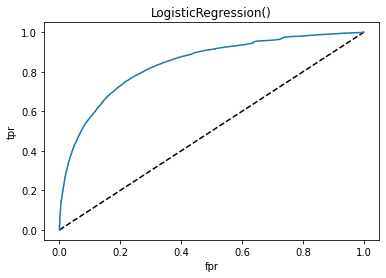

0.8409847095954208


In [121]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(lg)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

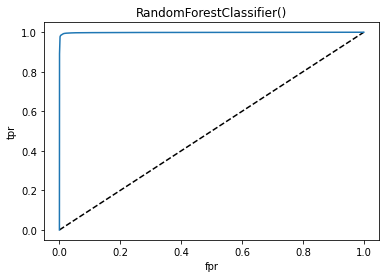

0.9987068025559115


In [122]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(rf)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

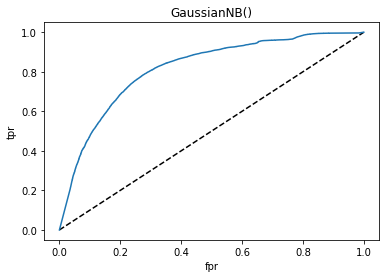

0.816316897125168


In [123]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred_prob=gn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(gn)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


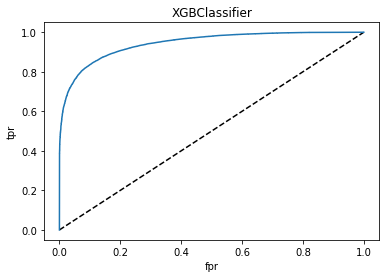

0.9435431432380462


In [124]:
ex=XGBClassifier()
ex.fit(x_train,y_train)
y_pred_prob=ex.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XGBClassifier')
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

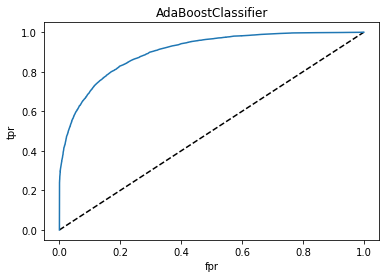

0.9022311542139568


In [125]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AdaBoostClassifier')
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

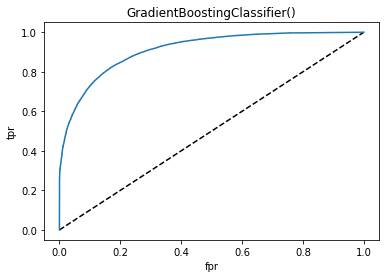

0.9117776471179648


In [126]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(gb)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

After using both undersampling and oversampling,we found that some data is loss incase of undersampling.We found that both from cross_val_score and roc_auc_curve oversampling is best for this dataset.Recall,precision,roc_auc_score and cvscore is high compared to other algorithm in ranomforestclassifier.So our best model for this dataset is randomforestclassifier.So we have to hypertuning its parameter to improve it's accuracy

# HyperParameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
parameter={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [130]:
rf=RandomForestClassifier()
gscv=GridSearchCV(rf,parameter,cv=4)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'gini', 'max_features': 'auto'}

In [131]:
gscv.best_estimator_

RandomForestClassifier()

In [133]:
gscv.best_score_

0.9701024036606207

In [136]:
rf=RandomForestClassifier(criterion= 'gini',max_features= 'auto')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9780031975301836
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     36340
           1       1.00      0.96      0.98     36216

    accuracy                           0.98     72556
   macro avg       0.98      0.98      0.98     72556
weighted avg       0.98      0.98      0.98     72556

[[36286    54]
 [ 1542 34674]]


After hypertuning its parameter we get accuracy score of 97.80% from 97.78%.

# Saving Model

In [137]:
import joblib
joblib.dump(rf,'microcreditdata.obj')

['microcreditdata.obj']